In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [149]:
df = df.replace(['NaN'], None)

In [150]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

<Axes: >

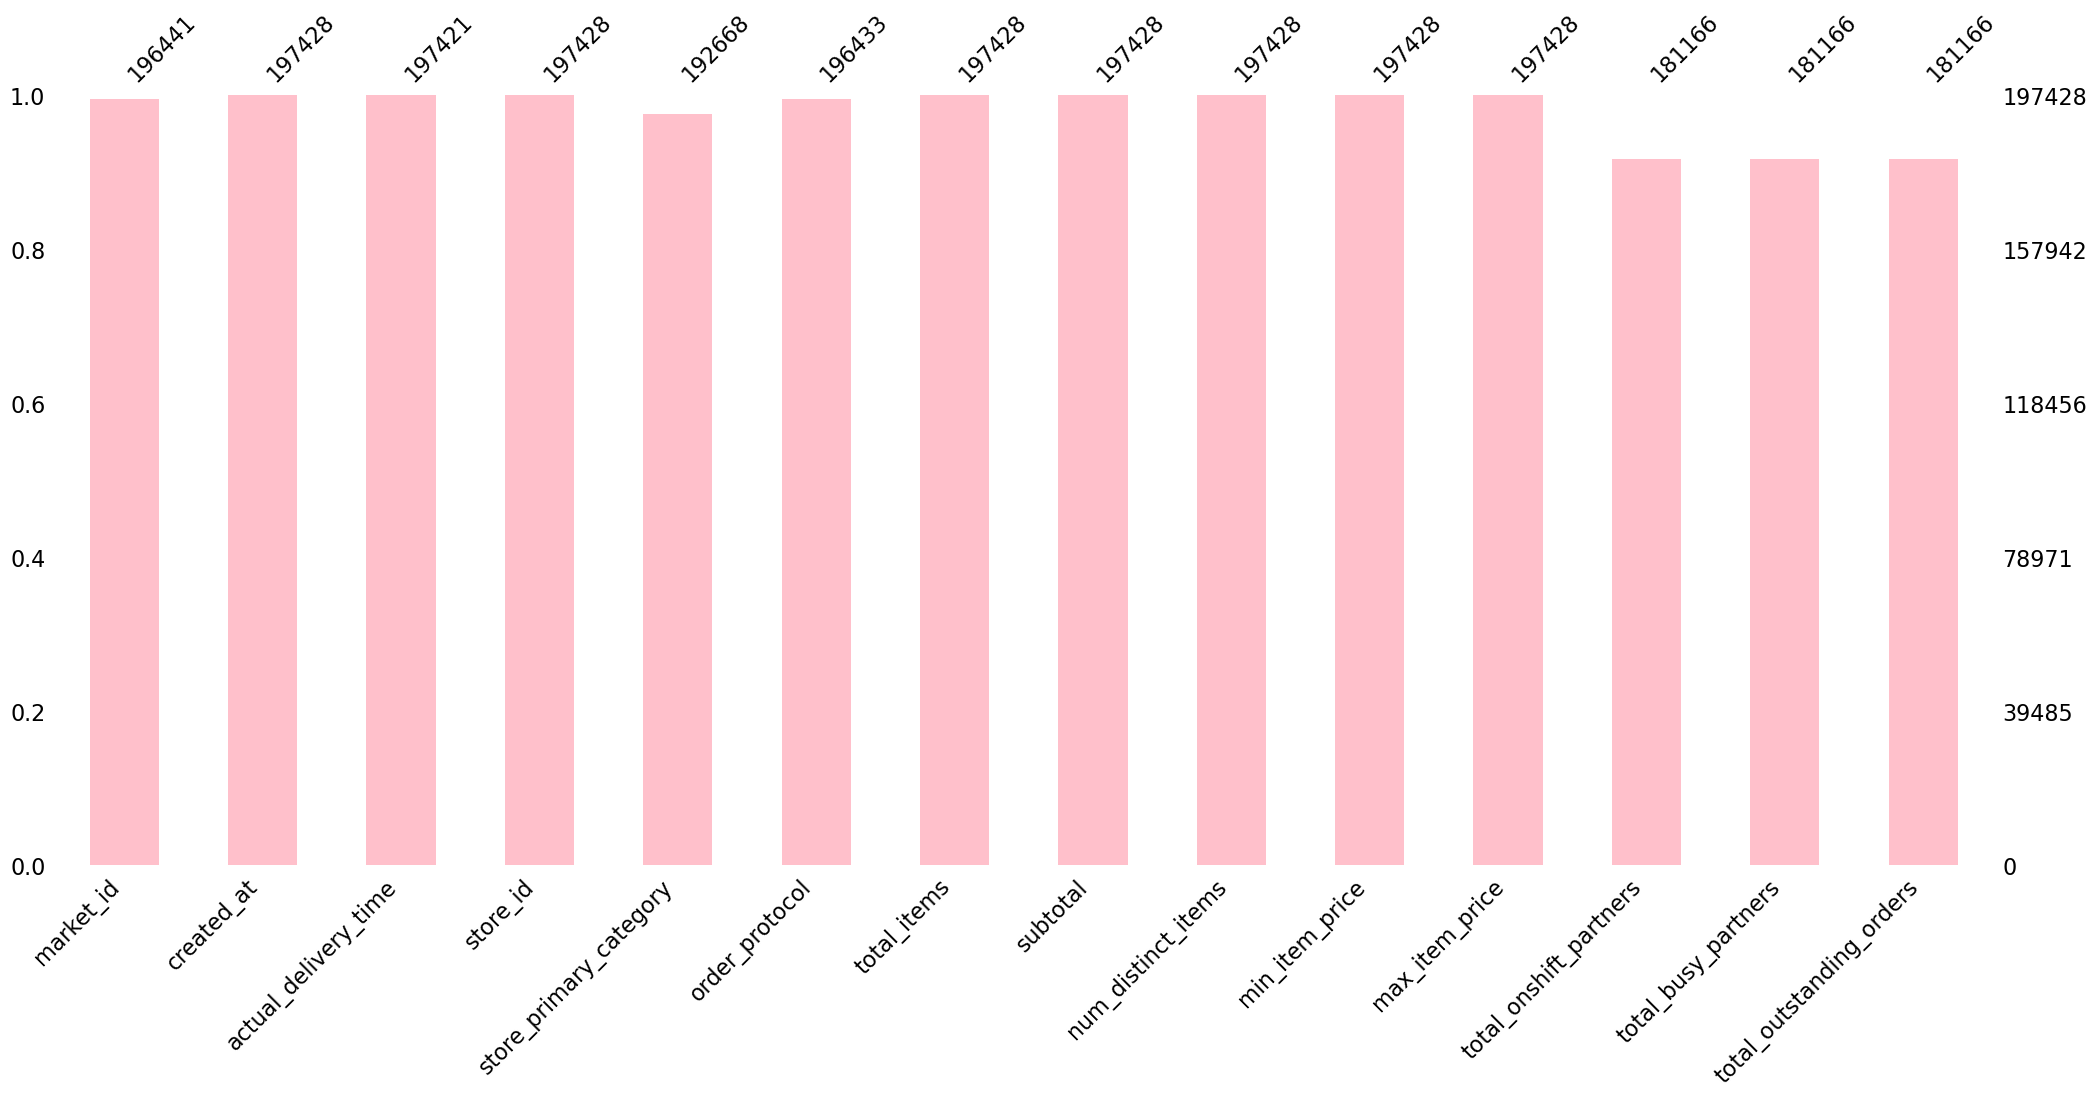

In [151]:
import missingno as mso
mso.bar(df, color='pink')

<Axes: >

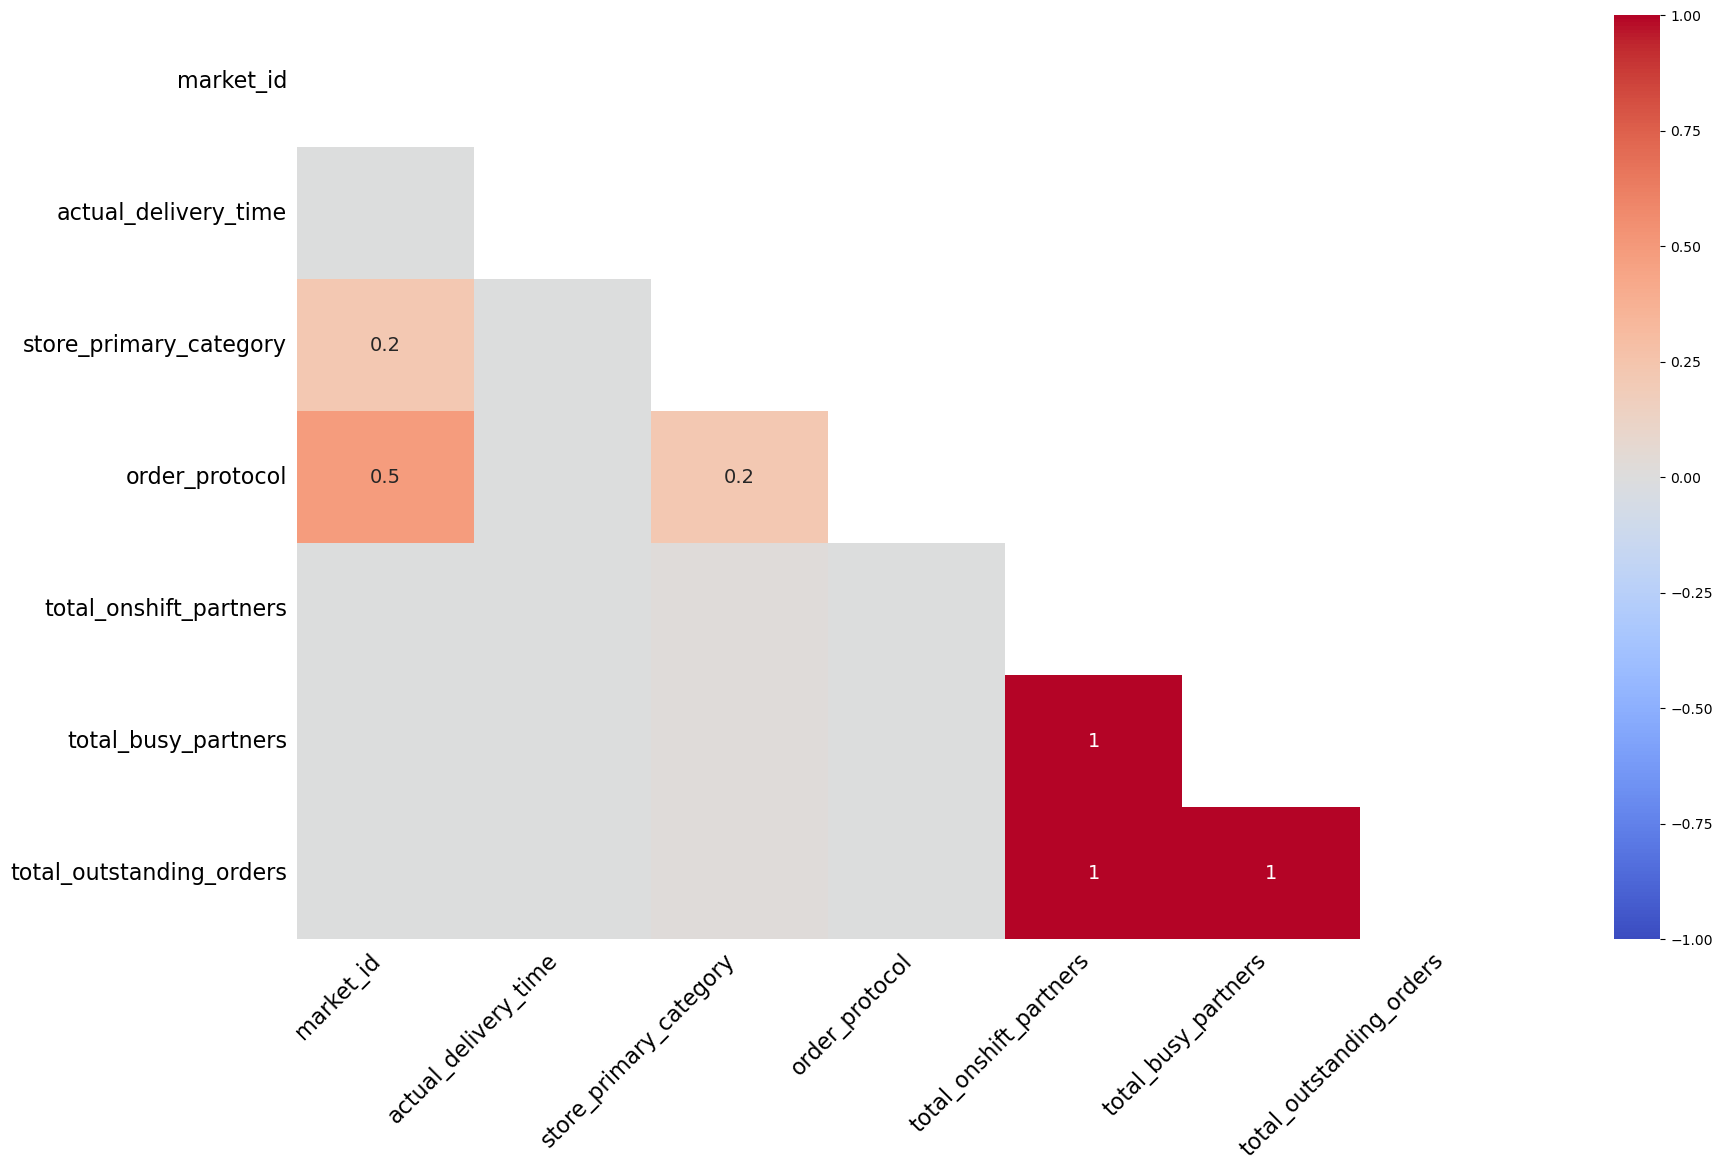

In [152]:
mso.heatmap(df, cmap='coolwarm')

In [153]:
df.dropna(inplace=True)
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   created_at                176248 non-null  object 
 2   actual_delivery_time      176248 non-null  object 
 3   store_id                  176248 non-null  object 
 4   store_primary_category    176248 non-null  object 
 5   order_protocol            176248 non-null  float64
 6   total_items               176248 non-null  int64  
 7   subtotal                  176248 non-null  int64  
 8   num_distinct_items        176248 non-null  int64  
 9   min_item_price            176248 non-null  int64  
 10  max_item_price            176248 non-null  int64  
 11  total_onshift_partners    176248 non-null  float64
 12  total_busy_partners       176248 non-null  float64
 13  total_outstanding_orders  176248 non-null  f

In [155]:
df["store_primary_category"].value_counts()

american             18223
pizza                15782
mexican              15624
burger                9936
sandwich              9046
                     ...  
african                 10
lebanese                 9
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 73, dtype: int64

In [156]:
df["store_primary_category"] = df["store_primary_category"].astype('category')
df.dtypes

market_id                    float64
created_at                    object
actual_delivery_time          object
store_id                      object
store_primary_category      category
order_protocol               float64
total_items                    int64
subtotal                       int64
num_distinct_items             int64
min_item_price                 int64
max_item_price                 int64
total_onshift_partners       float64
total_busy_partners          float64
total_outstanding_orders     float64
dtype: object

In [157]:
df["store_primary_category"] = df["store_primary_category"].cat.codes
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0


In [158]:
df.drop(columns={'actual_delivery_time','created_at', 'store_id'}, inplace=True)
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
8,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0
14,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0
15,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0


In [159]:
df.describe()


,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
mean,2.743747,35.891482,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800
std,1.330911,20.728572,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,18.000000,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000
50%,2.000000,38.000000,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000
75%,4.000000,55.000000,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [160]:
df.duplicated().any()

True

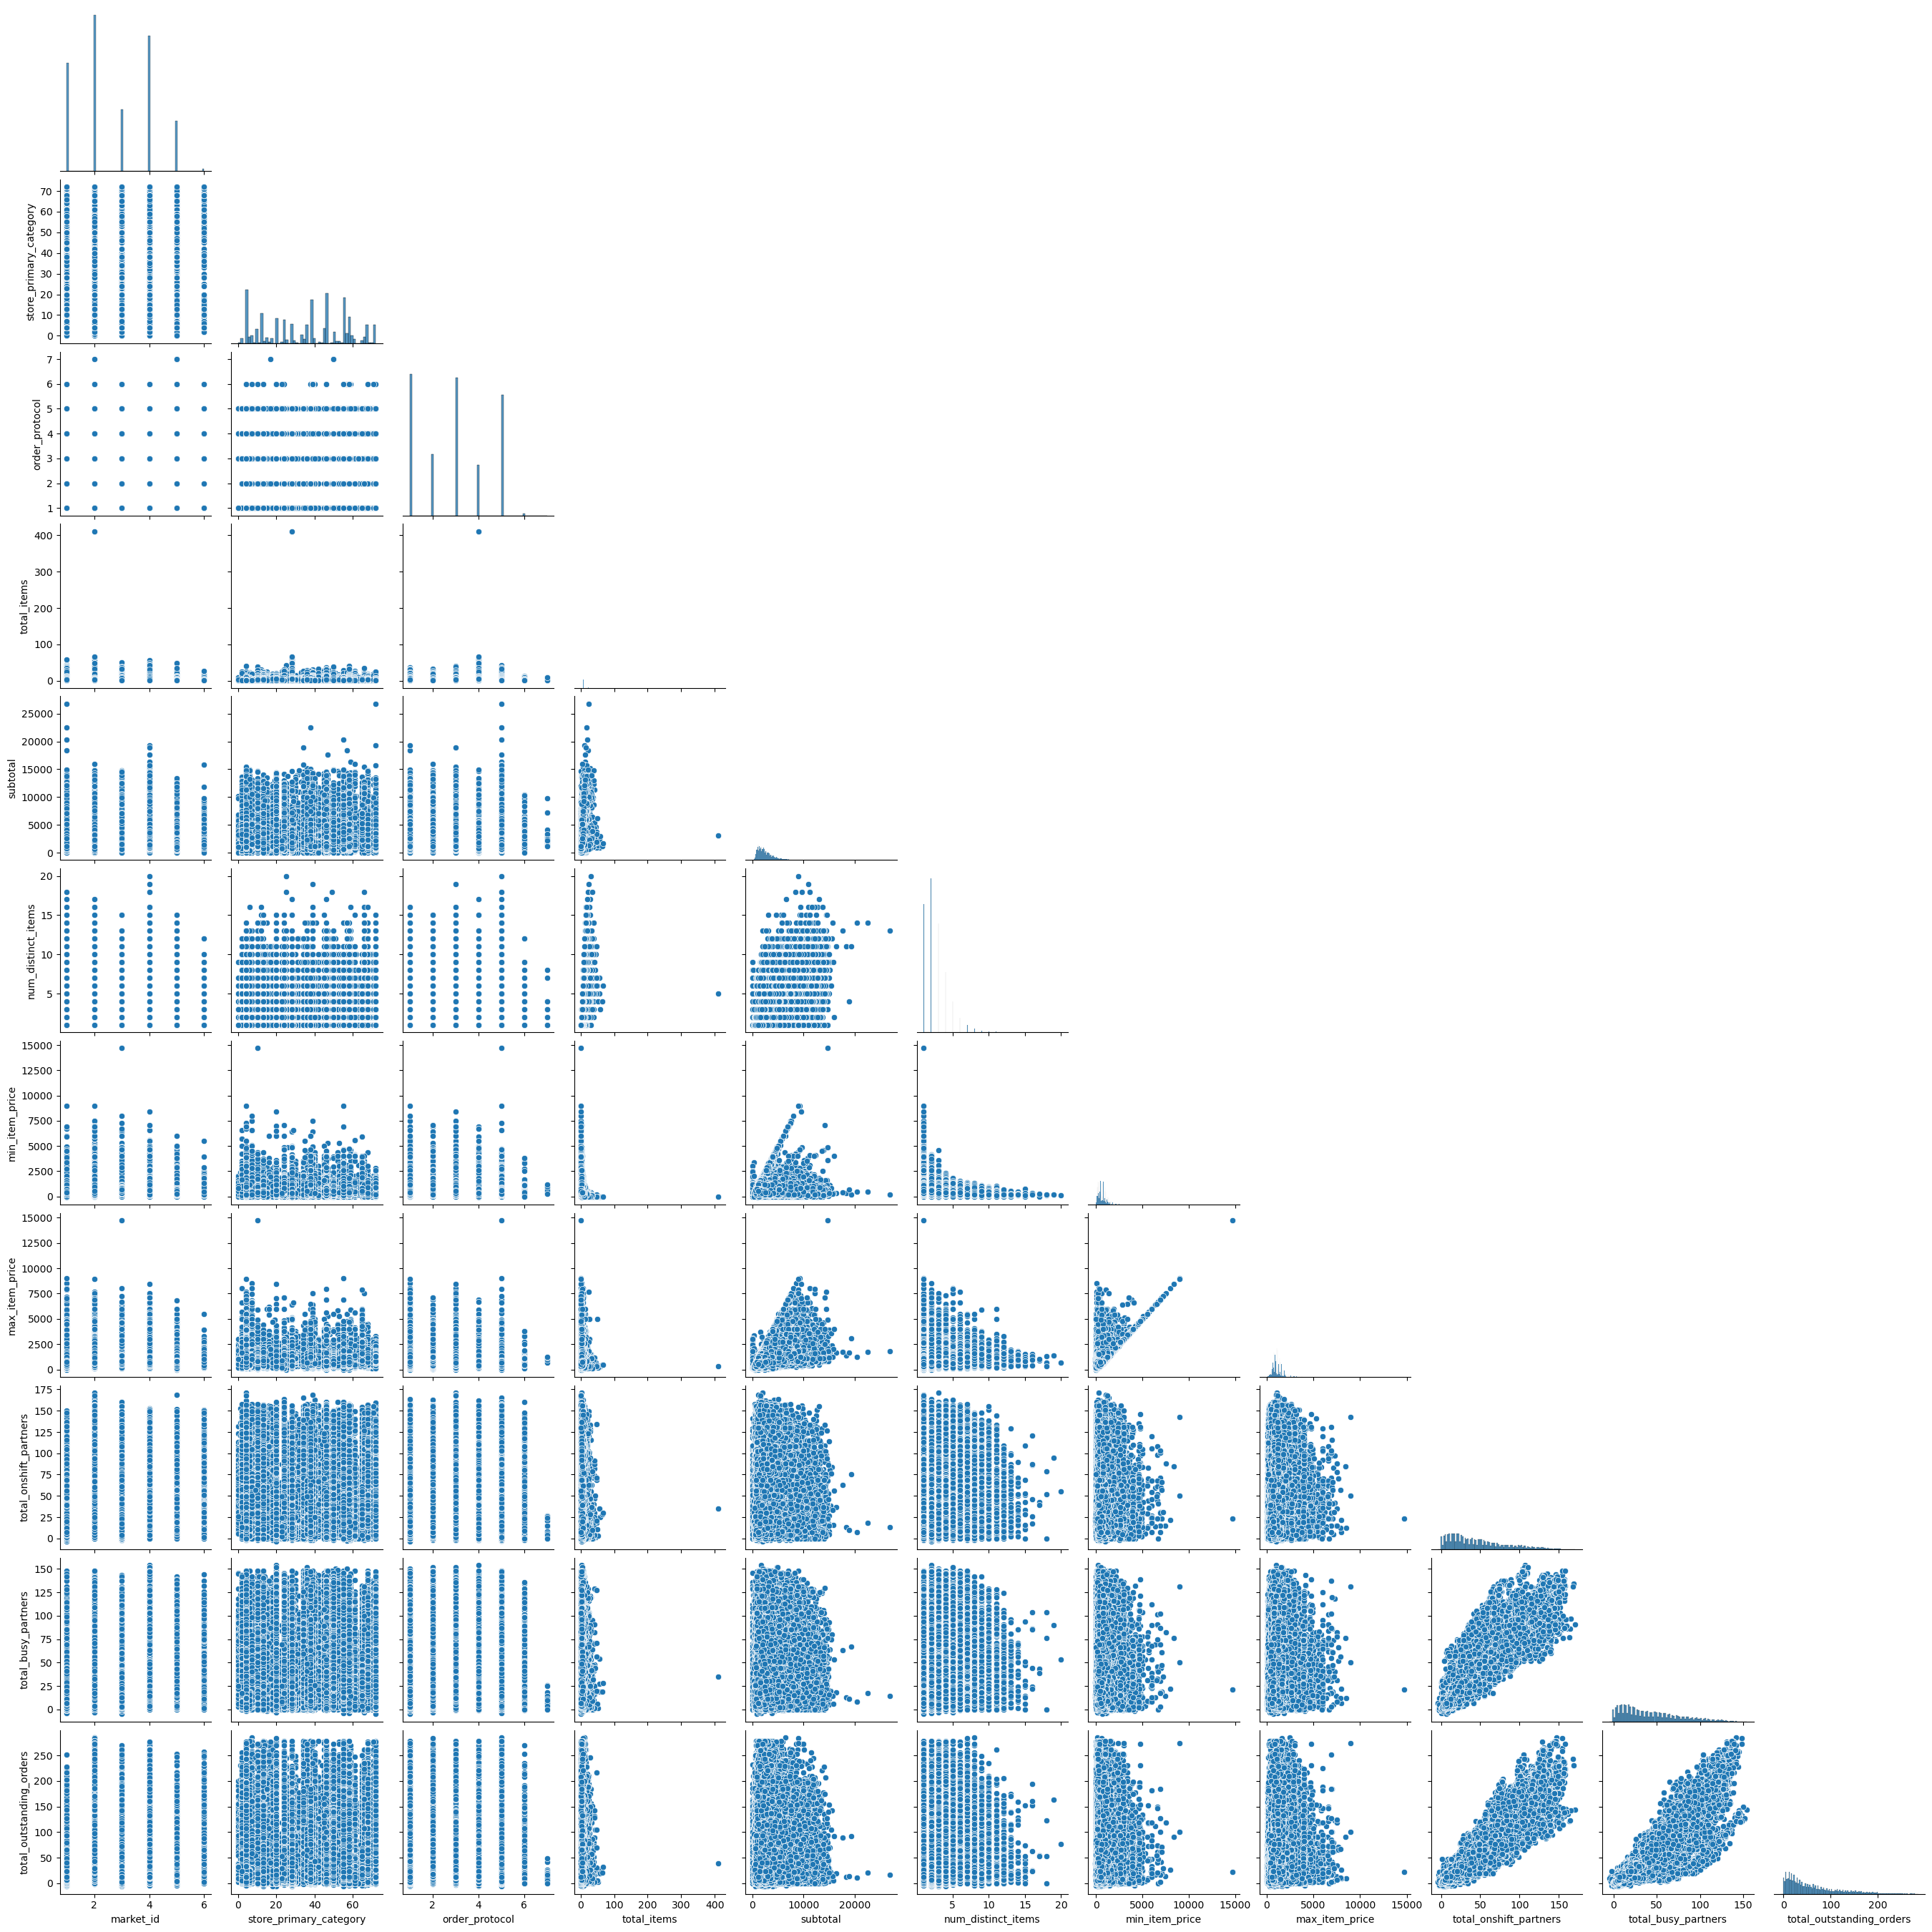

In [161]:
sns.pairplot(df, corner=True)

<Axes: >

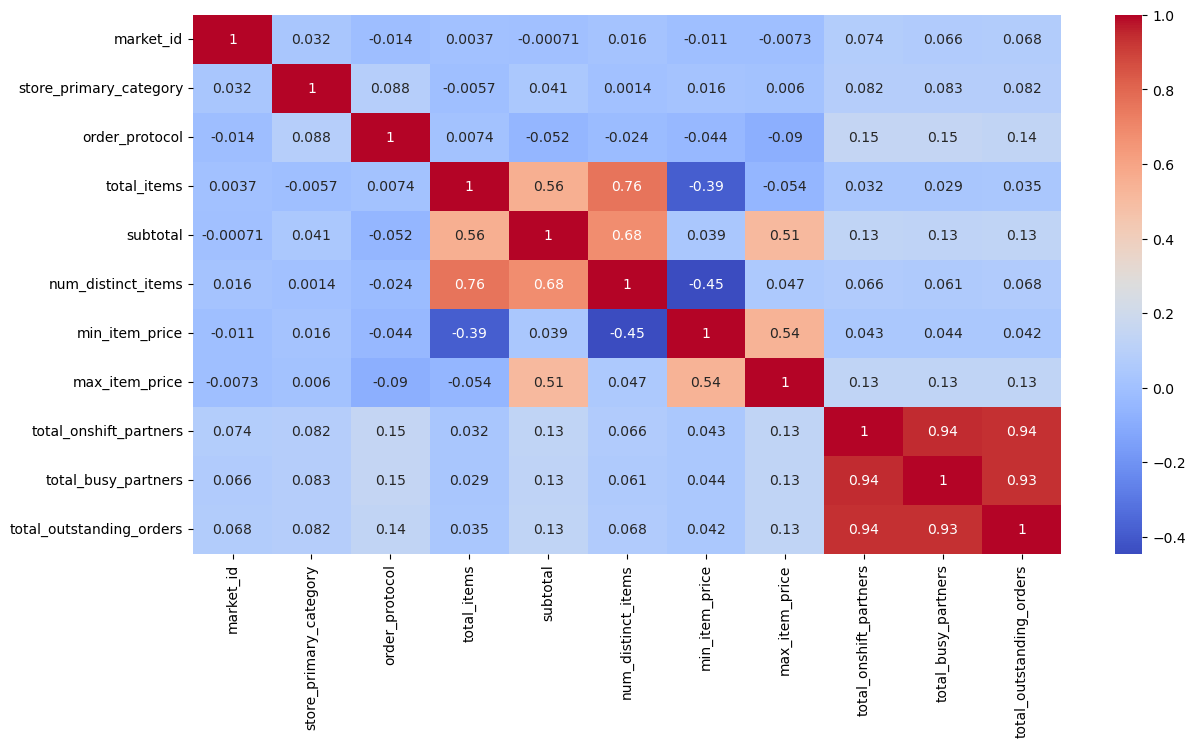

In [162]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [168]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

In [164]:
X = df.drop(columns='min_item_price')
y = df['min_item_price']

In [165]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 176248 entries, 0 to 197427
Series name: min_item_price
Non-Null Count   Dtype
--------------   -----
176248 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [169]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
LR_predictions=lr.predict(X_test)
print("Accuracy of Logistic Regression: {}%".format(lr.score(X_test, y_test) * 100 ), "%\n")
print(LR_predictions)

Accuracy of Logistic Regression: 53.070052533570774% %

[ 400.41115669  561.88631698  430.38081036 ...  922.04168779 1042.85470965
   30.32313307]


In [170]:
#Decision Tree Regression
dtr= DecisionTreeRegressor(random_state=5,max_depth=4)
dtr.fit(X_train,y_train)
DecisionTree_predictions=dtr.predict(X_test)
print("Accuracy of Decision Tree: {}%".format(dtr.score(X_test, y_test) * 100 ), "%\n")
print(DecisionTree_predictions)

Accuracy of Decision Tree: 75.22820125123502% %

[ 577.18960665  577.18960665  577.18960665 ... 1092.73463898 1422.48590917
  360.39660431]


In [171]:
RF = RandomForestRegressor(n_estimators=63)
RF.fit(X_train, y_train)
RF_predictions=RF.predict(X_test)
print("Accuracy of Random Forest: {}%".format(RF.score(X_test, y_test) * 100 ), "%\n")
print(RF_predictions)

Accuracy of Random Forest: 92.77841195930274% %

[ 356.04761905  603.73015873  276.07936508 ... 1150.         1387.57142857
  387.77777778]


In [172]:
LS = LassoCV()
LS.fit(X_train, y_train)
LS_predictions = LS.predict(X_test)
print("Accuracy of Lasso: {}%".format(LS.score(X_test, y_test) * 100 ), "%\n")
print(LS_predictions)

Accuracy of Lasso: 44.740577407281194% %

[512.26238753 627.38603851 601.25644686 ... 847.83587976 982.16350182
  28.60082713]


In [173]:
RD = RidgeCV()
RD.fit(X_train, y_train)
RD_predictions=LS.predict(X_test)
print("Accuracy of Ridge: {}%".format(RD.score(X_test, y_test) * 100 ), "%\n")
print(RD_predictions)

Accuracy of Ridge: 53.07097466509234% %

[512.26238753 627.38603851 601.25644686 ... 847.83587976 982.16350182
  28.60082713]


In [174]:
EL = ElasticNetCV()
EL.fit(X_train, y_train)
EL_predicitons=EL.predict(X_test)
print("Accuracy of Elastic Net: {}%".format(EL.score(X_test, y_test) * 100 ), "%\n")
print(EL_predicitons)

Accuracy of Elastic Net: 36.75859543018105% %

[558.33190163 645.40067125 675.69554594 ... 822.65512418 963.53795667
  38.21061706]
